<a href="https://www.kaggle.com/amsamms/analyze-a-b-test-results?scriptVersionId=90453498" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('../input/ab-data/ab_data.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [5]:
n_rows = df.shape[0]
print(' Number of rows in dataset is {}'.format(n_rows))

 Number of rows in dataset is 294478


c. The number of unique users in the dataset.

In [6]:
n_unique_id=df.user_id.nunique()
print(' Number of unique users in the dataset is {}'.format(n_unique_id))

 Number of unique users in the dataset is 290584


d. The proportion of users converted.

In [7]:
# counting converted portion from unique id only
df_unique=df[~df.duplicated(subset='user_id', keep='first')]
converted_proportion=df_unique['converted'].mean()
print('The proportion of users converted is {} from all unique users' .format(converted_proportion))

The proportion of users converted is 0.1195695564793657 from all unique users


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
# calculating it in one long code :
df[((df['group']=='treatment') & (df['landing_page']!='new_page'))|((df['group']!='treatment') & (df['landing_page']=='new_page'))].shape[0]

3893

In [9]:
# or it can be solved in two steps for readability, 1st get treatment only, then get new_page only and finally add them up
treatment_only = df[((df['group']=='treatment') & (df['landing_page']!='new_page'))].shape[0]
new_page_only =  df[((df['group']!='treatment') & (df['landing_page']=='new_page'))].shape[0]
print (" the number of times the new_page and treatment don't line up is {}".format(treatment_only+new_page_only))                    
                    

 the number of times the new_page and treatment don't line up is 3893


f. Do any of the rows have missing values?

In [10]:
df.isnull().sum().any()

False

Rows doesn't have missing value as proven by `df.info()` and by `isnull` function

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# using the inverse of the one long code above
df2=df[~(((df['group']=='treatment') & (df['landing_page']!='new_page'))|((df['group']!='treatment') & (df['landing_page']=='new_page')))]

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
u_id_df2=df2.user_id.nunique()
print("there are {} unique user_ids in df2".format(u_id_df2))

there are 290584 unique user_ids in df2


b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
duplicated_id=df2[df2.duplicated(subset='user_id')]['user_id'].values[0]
print(" the only duplicated user_id is {}".format(duplicated_id))

 the only duplicated user_id is 773192


c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.duplicated(subset='user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# i think before removal, i should check treatment starting and ending time to remove the correct duplicate raw 
print (df.timestamp.min(), df.timestamp.max())

2017-01-02 13:42:05.378582 2017-01-24 13:41:54.460509


SO The same id entered twice during treatment period, we can remove either of them, i will remove the first one

In [17]:
df2=df2.loc[~(df2.index==1899),:]

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
conversion_proportion=(df2['converted']==1).mean()
print( 'the propability of an individual converting regardless of the page they receive is {}'.format(conversion_proportion))

the propability of an individual converting regardless of the page they receive is 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
control_conversion= (df2[df2['group']=='control']['converted']==1).mean()
print('the probability of conversion given that the individual is in the control group is {}'.format(control_conversion))

the probability of conversion given that the individual is in the control group is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
treatment_conversion= (df2[df2['group']=='treatment']['converted']==1).mean()
print('the probability of conversion given that the individual is in the treatment group is {}'.format(treatment_conversion))

the probability of conversion given that the individual is in the treatment group is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [21]:
df2.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [22]:
new_page_probability=(df2['landing_page']=='new_page').mean()
print(' Ptobability of recieving the new page is {} i.e half of the sample.'.format(new_page_probability))

 Ptobability of recieving the new page is 0.5000619442226688 i.e half of the sample.


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

- in this sample, conversion is around 11.96 %
- 12.04 % of user who experienced old page were converted (around 6.02 % of the sample or around 50.3 % of total conversion )
- 11.88 % of users who experienced new page were converted (around 5.94 % of the sample or around 49.7 % of total convesrion )
- From this sample alone it seems new design is not effective in conversion. Actually it is slightly worse, but to see the effect on the population we should perform a hypothesis test
- Apart from the above results, 11.96 % conversion may be considered low, if we want to increase this conversion substintially, we have to do more than *changing design !!*

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
$$H_0: p _{new} - p _{old}   \leq 0$$

$$H_1: p _{new} - p _{old}   > 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
p_new=df2['converted'].mean()
print("converted rate under the null for new assuming equality of new and old is {}".format (p_new) )

converted rate under the null for new assuming equality of new and old is 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
p_old=df2['converted'].mean()
print("converted rate under the null for old assuming equality of new and old is {}".format (p_old) )

converted rate under the null for old assuming equality of new and old is 0.11959708724499628


c. What is $n_{new}$?

In [25]:
n_new=df2[df2['group']=='treatment'].shape[0]
print( "New page users number is {}".format(n_new))

New page users number is 145310


d. What is $n_{old}$?

In [26]:
n_old=df2[df2['group']=='control'].shape[0]
print( "Old page users number is {}".format(n_old))

Old page users number is 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.choice([1, 0], size=n_new, p = [p_new, 1-p_new])
new_page_converted.mean()

0.11889752941986098

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([1, 0], size=n_old, p = [p_old, 1-p_old])
old_page_converted.mean()

0.11971171716893594

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
new_page_converted.mean()-old_page_converted.mean()

-0.0008141877490749627

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([1, 0],size=n_new,p = [p_new, 1-p_new])
    old_page_converted = np.random.choice([1, 0],size=n_old,p = [p_old, 1-p_old])
    p_new_new = new_page_converted.mean()
    p_old_old = old_page_converted.mean()
    p_diff=p_new_new-p_old_old
    p_diffs.append(p_diff)

In [31]:
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

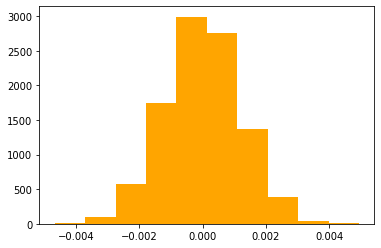

In [32]:
plt.hist(p_diffs,color='orange', stacked=True)
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
difference_observed = df2[df2['group']=='treatment']['converted'].mean()-df2[df2['group']=='control']['converted'].mean()
difference_observed

-0.0015782389853555567

In [34]:
(p_diffs>difference_observed).mean()

0.9027

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

* the calculated in part J is a probability, P_value
* This calculated propability is the probability of observed difference or extreme values in favor of the alternative hypothesis happening in  sampling distribution simulation
* simply this value represents the probability of obtaining sample rersult if null hypothesis is true 

## Easier for me and more comprehended is to do the hypothesis test as follows:
`1` to bootstrap the sample

`2` then simulate normal distributation under the null hypothesis with the center of the simulation closest to the alternative ( in our case zero)  and standard deviation equal to sampling distribution ( in our case bootstraping sample standard deviation)

`3` Finally draw many data from that simulated normal distribution and find the probability as shown in the following cells

### Kindly be patient as the following cell takes a while

In [35]:
# bootstraping the sample to get new samples and calculate new p values and difference for each point
p_diffs=[]
for i in range(10000):
    bootsample = df2.sample(df2.shape[0],replace=True)
    n_new=bootsample[bootsample['group']=='treatment']['converted']
    p_new=n_new.mean()
    n_old=bootsample[bootsample['group']=='control']['converted']
    p_old=n_old.mean()
    p_diff=p_new-p_old
    p_diffs.append(p_diff)
p_diffs=np.array(p_diffs)

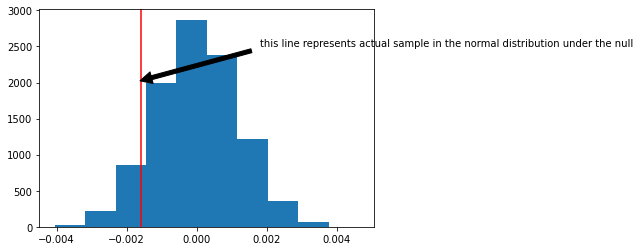

In [36]:
# then we simulate normal distrubution under the null hypothesis
null_vals=np.random.normal(0,p_diffs.std(),p_diffs.shape[0])
plt.hist(null_vals)
plt.axvline(difference_observed, color='r')
plt.annotate('this line represents actual sample in the normal distribution under the null ', xy=(-.0018, 2000), xytext=(0.0018, 2500),
             arrowprops=dict(facecolor='black', shrink=0.05),)
plt.show()

In [37]:
p_value=(null_vals>difference_observed).mean()
p_value

0.9077

the probability of having the actual sample observed difference probability or mor extreme in favor if the alternative is 0.91. Assuming 0.05  $\alpha$  level ,then we have enough evidence to fail to reject the null hypothesis as the difference is not significant 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = df2[(df2['landing_page']=='old_page') & (df2['converted']==1)].shape[0]
convert_new = df2[(df2['landing_page']=='new_page') & (df2['converted']==1) ].shape[0]
n_old =df2[df2['landing_page']=='old_page'].shape[0] 
n_new = df2[df2['landing_page']=='new_page'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [39]:
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new, n_old],alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

* Z_score means the number of standard deviation our value away from the mean, so in hour case the sample observed  difference is on the left of the center of zero by 1.3 standard deviation
* the propability ( which is larger) is from 1.3 standard deviation from the left to the center + all propabilites of the right of the center, which summed to be 90.5 % vs bootstraping calculation of 90.5 % , pretty close right ?

In [40]:
# we can also use ttest for two independent samples using scipy using the following link
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
import scipy.stats as stats
stats.ttest_ind(df2[df2['group']=='treatment']['converted'],df2[df2['group']=='control']['converted'], alternative='greater')

Ttest_indResult(statistic=-1.3109235634981506, pvalue=0.9050576875062869)

* Also the results are similar to Z-score and bootstrapping technique


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression, where y output is one of two possibilities

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
df2['intercept']=1

In [42]:
# Creating a function that returns 1 if group is treatment and zero otherwise
def converter(x):
    if x=='treatment':
        return 1
    else:
        return 0                   
        
df2['ab_page']=df2['group'].apply(converter)


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [43]:
# Using logistic regression
import statsmodels.api as sm
Y=df2['converted']
X=df2[['intercept','ab_page']]
model=sm.Logit(Y,X)
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Mar 2022   Pseudo R-squ.:               8.077e-06
Time:                        14:30:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

* P_value associated with ab_page is 0.19, and it is different as this is considered two tail Where : 
$$ H_o: \beta_1 = 0 $$
$$ H_1: \beta_1 \ne 0 $$
* $\beta_1$ is the coeffecient associated with page selection in the population, here it is not significant as it is relatively high, also zero is between the confidence interval as shown in the reults
* so we can conclude that ab_page change is not significant in expecting conversion rate ( wether individual experience old page or new page, it is not sagnificant)  ( same results as part II )

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

* Page change is not sagnificant as proven above
* other factors added may increase the r-squared and form a more optimized model, provided that multocolinearity is eleminated

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
df_countries=pd.read_csv('../input/ab-data/countries.csv')

In [46]:
df_new=pd.merge(df2,df_countries,how='inner',on = 'user_id') # merging both dataframes on common column of user_id

In [47]:
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country']) # creating dummy_variables

In [48]:
Y_new=df_new['converted']
X_new=df_new[['intercept','ab_page','CA','UK']]
model_new=sm.Logit(Y_new,X_new)
results_new=model.fit()
results_new.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Mar 2022   Pseudo R-squ.:               8.077e-06
Time:                        14:30:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

* Countries also seems to have no significant effect on conversion as app associated P values are high

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
# i will creat two more columns each is a multiplication of ab_page and one country ( which i don't see useful before even starting )
df_new['ab_page & CA']=df_new['ab_page']*df_new['CA']
df_new['ab_page & UK']=df_new['ab_page']*df_new['UK']

In [50]:
Y_newest=df_new['converted']
X_newest=df_new[['intercept','ab_page','CA','UK','ab_page & CA','ab_page & UK']]
model_newest=sm.Logit(Y_newest,X_newest)
results_newest=model_newest.fit()
results_newest.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Mar 2022   Pseudo R-squ.:               3.482e-05
Time:                        14:30:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page         -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA              -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK              -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page & CA    -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_page & UK     0.0314      0.027      1.181      0.238      -0.021       0.084
================================================================================
"""

All factors we considered in this logistic regression are insignificant in predecting population conversion rate

I am going to try a final attempt to add timestamp to the regression model with two aspects:

`1` first aspect is wether the timestamp was recorded earlier of the test period or in later stage of the test period

`2` second aspect is wether the timpestamp was recorded, morning, night or late_night

In [51]:
# converting timestamp to timestamp object
df_new['timestamp']=pd.to_datetime(df_new['timestamp'])

In [52]:
# define staring time of the test, ending time of the test, and  median
start=df_new['timestamp'].min()
end=df_new['timestamp'].max()
median= df_new['timestamp'].median()

In [53]:
# Creating a dummy variable returning 1 if early stage of test period and 0 if in the later stage of test period
def early_converter(x):
    if x<median:
        return 1
    else:
        return 0                   
        
df_new['early']=df_new['timestamp'].apply(early_converter)


In [54]:
# similarly creating a dummy variable for daytime
# 1st lets have a column of hour from the timestamp column
df_new['hour_of_day']=df_new['timestamp'].apply(lambda  x : x.hour)

In [55]:
# 2nd creating 3 categories of daytime by first creating zero columns, then reassign them
df_new['morning']=0   
df_new['night']=0
df_new['late_night']=0 

In [56]:
# assigning value of 1 to columns that only meat the prespecified condition where
# morning = from 8 to 16
# night = from 16 to 24
# late_night = from 0 to 8
df_new.loc[(df_new['hour_of_day']<16) & (df_new['hour_of_day']>=8),'morning']=1
df_new.loc[(df_new['hour_of_day']<24) & (df_new['hour_of_day']>=16),'night']=1
df_new.loc[(df_new['hour_of_day']<8) & (df_new['hour_of_day']>=0),'late_night']=1

In [57]:
# testing new columns
df_new[['timestamp','early','hour_of_day','morning','night','late_night']].sample(6)

,timestamp,early,hour_of_day,morning,night,late_night
289414,2017-01-09 00:19:40.390624,1,0,0,0,1
216387,2017-01-19 11:54:03.205034,0,11,1,0,0
81286,2017-01-20 16:32:02.719805,0,16,0,1,0
174885,2017-01-04 10:21:42.428668,1,10,1,0,0
99300,2017-01-13 00:41:37.978236,1,0,0,0,1
161091,2017-01-02 20:14:21.868469,1,20,0,1,0


In [58]:
# final step before building the model is to check multicolinearity by checking variance inflamation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_new[['intercept','ab_page','CA','UK','ab_page & CA','ab_page & UK','early','morning','night']]
vif=pd.DataFrame()
vif['feature']=x.columns
vif['vif']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif

,feature,vif
0,intercept,5.862395
1,ab_page,1.427099
2,CA,2.049247
3,UK,2.030774
4,ab_page & CA,2.103536
5,ab_page & UK,2.366598
6,early,1.000056
7,morning,1.333621
8,night,1.333620


all factors are less than 10, so there is no dependancy between indpendent variables. Now the columns are tested and ready for building our model

In [59]:
Y_final=df_new['converted']
X_final=df_new[['intercept','ab_page','CA','UK','ab_page & CA','ab_page & UK','early','morning','night']]
model_final=sm.Logit(Y_final,X_final)
results_final=model_final.fit()
results_final.summary()

Optimization terminated successfully.
         Current function value: 0.366089
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290575
Method:                           MLE   Df Model:                            8
Date:                Fri, 18 Mar 2022   Pseudo R-squ.:               8.862e-05
Time:                        14:30:49   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.01565
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -2.0022      0.014   -144.374      0.000      -2.029      -1.975
ab_page         -0.0206      0.014     -1.506      0.132      -0.047       0.006
CA              -0.0173      0.038     -0.459      0.646      -0.091       0.057
UK              -0.0056      0.019     -0.301      0.764      -0.042       0.031
ab_page & CA    -0.0467      0.054     -0.869      0.385      -0.152       0.059
ab_page & UK     0.0316      0.027      1.188      0.235      -0.021       0.084
early           -0.0177      0.011     -1.549      0.121      -0.040       0.005
morning          0.0373      0.014      2.657      0.008       0.010       0.065
night            0.0358      0.014      2.551      0.011       0.008       0.063
================================================================================
"""

* Finally some sagnificant coeffecient !
* morning and night coeffecient seems to be sagnificant as the p value is lower than 0.05, also  zero is not within the confidance interval

In [60]:
np.exp(0.0373), np.exp(0.0358)
print ('in the morning time of the day as compared to late_night, we expect multiplicative change in the ods of being in 1 category of {} holding all other variables contsant'.format(np.exp(0.0373)))
print ('\nnight time also has similar effect compared to late_night')

in the morning time of the day as compared to late_night, we expect multiplicative change in the ods of being in 1 category of 1.0380043754452644 holding all other variables contsant

night time also has similar effect compared to late_night


## Conclusions

* Based on hypothesis test results on the sample we have, we fail to reject the null
* All factors we considered in this logistic regression are insignificant in predecting population conversion rate except for different times of the day 
* in the morning time of the day as compared to late_night, we expect multiplicative change in the ods of being in 1 category of 1.04 holding all other variables contsant

* One way to increase  conversion rate in general in my opinion is the following :

`1` We should investigate other factors that affect conversion rate Like age, gender habbits,...ect

`2` Then we creat a good model that optimize our findings and define factors that significant in predicting the conversion rate

`3` finally we can target people that have those factors we identified in the model